In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from itertools import combinations
from sklearn.model_selection import cross_val_score
%matplotlib inline

1. Load in the dataset into pandas: grad.csv.

In [4]:
graddf = pd.read_csv('grad.csv')


In [5]:
graddf.head()


,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


2  Use the pandas describe method to get some preliminary summary statistics on the data. In particular look at the mean values of the features.


In [9]:
graddf.describe()


,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


3  Use the pandas crosstab method to see how many applicants from each rank of school were accepted. 

In [12]:
xtab = pd.crosstab(graddf['admit'], graddf['rank'])

In [13]:
xtab

rank,1,2,3,4
admit,,,,
0,28,97,93,55
1,33,54,28,12


Make a bar plot of the percent of applicants from each rank who were accepted. You can do .plot(kind="bar") on a pandas dataframe.

In [16]:
percentxtab = pd.crosstab(graddf['admit'], graddf['rank'], normalize='columns')

In [17]:
percentxtab

rank,1,2,3,4
admit,,,,
0,0.459016,0.642384,0.768595,0.820896
1,0.540984,0.357616,0.231405,0.179104


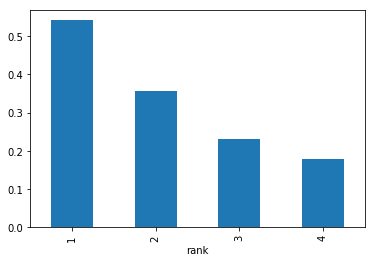

In [22]:
percentxtab.iloc[1].plot(kind = 'bar')

4  What does the distribution of the GPA and GRE scores look like? Do the distributions differ much?

Hint: Use the pandas hist method.

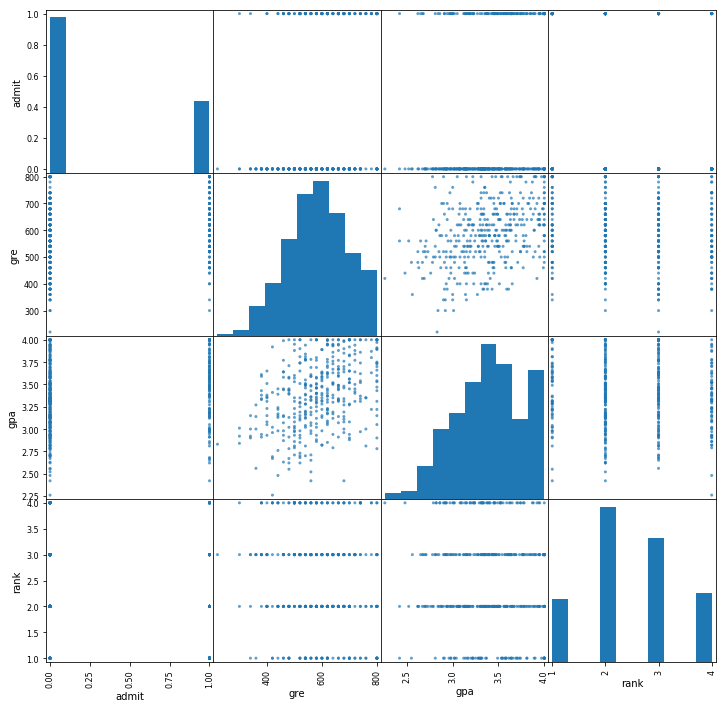

In [24]:
scatter_matrix(graddf, alpha=0.7, figsize=(12,12))
None

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D021588>]], dtype=object)

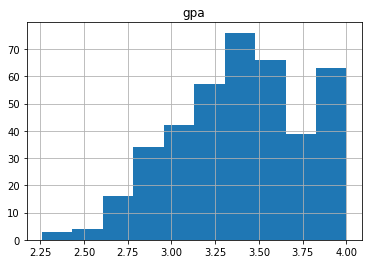

In [26]:
graddf.hist(column='gpa')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000CEE4518>]], dtype=object)

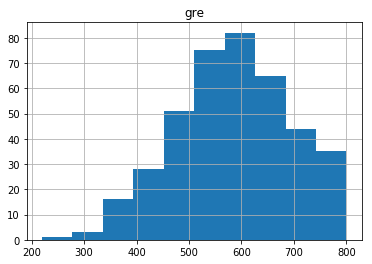

In [27]:
graddf.hist(column='gre')

Distributions are similar

5   One of the issues with classification can be unbalanced classes. What percentage of the data was admitted? Do you think this will be a problem?

Answer:  32% of all applicants were admitted.   This is a conservative acceptance rate.  I don't think its a problem

6   Perform a Logistic Regression. (Do you need to change the rank column?)

In [29]:
y = graddf.admit
X = graddf[['gre']]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [33]:
model = LogisticRegression().fit(X_train, y_train) 
model.score(X_test, y_test)

0.68181818181818177

In [34]:
model.coef_

array([[ 0.00139291]])

In [35]:
model.intercept_

array([-1.5491761])

In [36]:
y = graddf.admit
rows = []
for i in range(1,4):
    combos = list(combinations(['gre', 'gpa', 'rank'],i))
    for combo in combos:
        model = LogisticRegression(fit_intercept=True)
        accuracy = cross_val_score(model, graddf[list(combo)], graddf.admit, cv=10, scoring='accuracy').mean()
        rows.append({'Accuracy': accuracy, 'Columns': combo})
df1 = pd.DataFrame(rows)

In [37]:
df1

,Accuracy,Columns
0,0.682570,"(gre,)"
1,0.682570,"(gpa,)"
2,0.659994,"(rank,)"
3,0.682570,"(gre, gpa)"
4,0.699762,"(gre, rank)"
5,0.717079,"(gpa, rank)"
6,0.702073,"(gre, gpa, rank)"


best fit is GPA & rank

Now I would try to dummify the rank column to see if I like that better.  I don't have time though

In [55]:
test = pd.get_dummies(graddf['rank'])
#i have to mess with this more to get this to work correctly

In [56]:
test.head()


,1,2,3,4
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1
